<a href="https://colab.research.google.com/github/Ugocode/African_Banking_Crisis/blob/master/AfricanBankingCrisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I will be working on the African Banking Crises Dataset to determine its causes

###First I import some necessary libraries



In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

sns.set(style='whitegrid', palette = 'deep')


# load my dataset from url

In [3]:

url = "https://raw.githubusercontent.com/Ugocode/African_Banking_Crisis/master/african_crises.csv"



In [4]:
data = pd.read_csv(url)

In [5]:
data.head(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


# Load dataset from my drive:

In [6]:
data_drive = pd.read_csv('/content/drive/MyDrive/african_crises.csv')

In [7]:
data_drive.head(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


# Lets continue with the data in the file

# Inspecting the data tail

In [8]:
data_drive.tail(3)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.9,1,1,0.0,4.920,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.9,1,1,0.0,3.720,1,0,0,no_crisis
1058,70,ZWE,Zimbabwe,2013,0,361.9,1,1,0.0,1.632,1,0,0,no_crisis


Describe our Data

In [9]:
data_drive.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


## Lets check for any missing data

In [10]:
data_drive.isnull().sum()

,0
case,0
cc3,0
country,0
year,0
systemic_crisis,0
exch_usd,0
domestic_debt_in_default,0
sovereign_external_debt_default,0
gdp_weighted_default,0
inflation_annual_cpi,0


As we can see above there is no missing data, so our data a a little bit clean

### Now I want to check the number of rows and columns

In [11]:
data_drive.shape

(1059, 14)

So we can see that there are 1059 rows and 14 columns

### Now let me see what my columns contain

In [12]:
data_drive.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

# Exploratory Data Analysis (EDA)

Lets see from our data the countries that has expirienced defferent types of crises

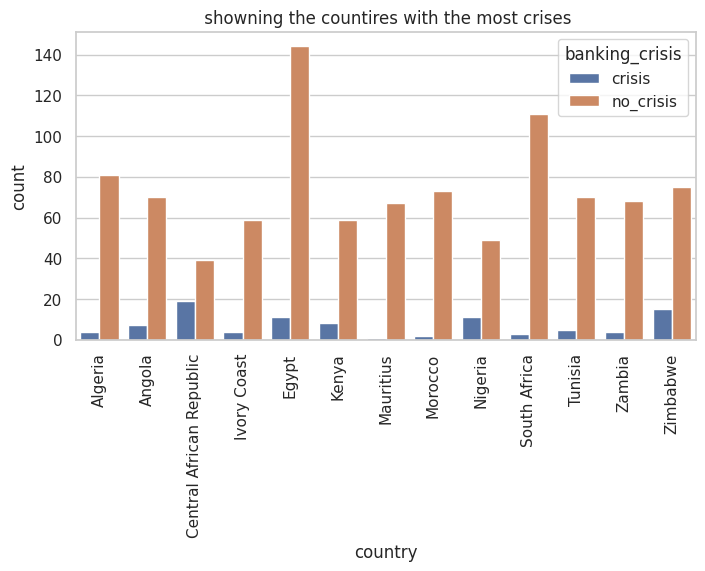

In [26]:
plt.figure(figsize = (8, 4))
sns.countplot(x= 'country', hue = 'banking_crisis', data = data_drive)
plt.title(' showning the countires with the most crises')
plt.xticks(rotation = 90)
plt.show()

From our EDA above it show us countries with the highest banking crisis at this particular period in time, the countries from the chat above are Central African Republic,Egypt, Zimbabwe and Nigeria

Now Lets see the countries that have high number of systemic crises to find any correlation

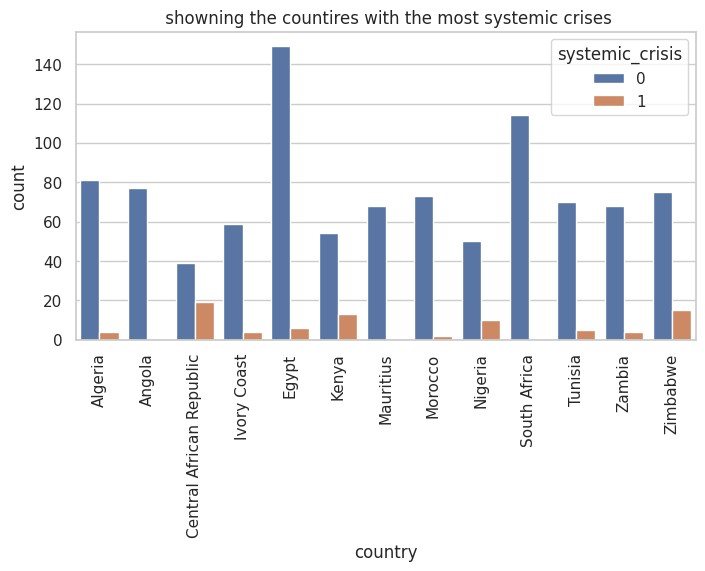

In [27]:

plt.figure(figsize = (8, 4))
sns.countplot(x= 'country', hue = 'systemic_crisis', data = data_drive)
plt.title(' showning the countires with the most systemic crises')
plt.xticks(rotation = 90)
plt.show()

We can see that most countries that have systemic faliures went ahead to have banking crisis, so we can as well attribute systemic crisis as a factor the help cause banking crisis in africa

Now because my target is to be able to predict if there will be a banking crises as a result of the other features I will like to see from my data the number of crises and no crisis in the data

<ipython-input-28-52447bd4925d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'banking_crisis', data = data_drive, palette = 'deep')


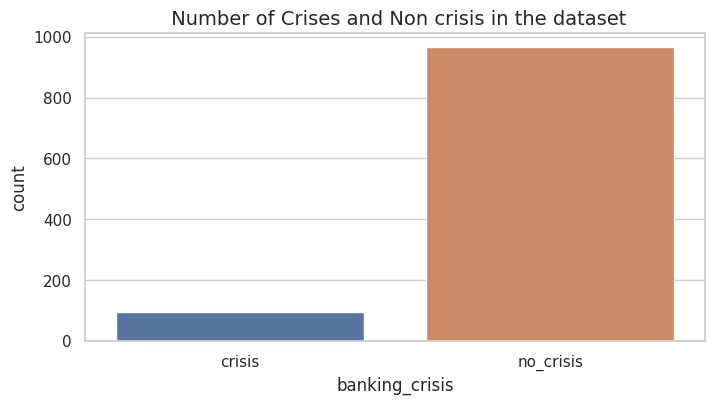

In [28]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'banking_crisis', data = data_drive, palette = 'deep')
plt.title(' Number of Crises and Non crisis in the dataset', fontsize = 14)
plt.show()

from our plot above we can see that the data is highly skewd, so it will not make our model work very well due to low number of crises. and as such I will perform some balancing to help the machine model be more accurate

# Using SMOTE

I’ll up-sample the crisis using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE: Works by creating synthetic samples from the minor class (crisis) instead of creating copies. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

### First Prepare the Data

In [29]:
data_drive['banking_crisis'] = data_drive['banking_crisis'].map({'no_crisis': 0, 'crisis': 1})

In [30]:
data_drive.banking_crisis.head(5)

,banking_crisis
0,1
1,0
2,0
3,0
4,0


In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
X = data.drop(['banking_crisis'], axis = 1)

In [33]:
X.head(3)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0


In [34]:
y = data_drive.banking_crisis

In [35]:
y.head(4)

,banking_crisis
0,1
1,0
2,0
3,0


I am dropping the cc3 which is simply a 3 letter country code column from the dataset and also the year which might cause problem for our machine learning algorithm

### Droping the irrelevant features

In [36]:
to_drop = ['case', 'cc3', 'year', 'country']

In [37]:
X.drop(to_drop, axis = 1, inplace = True)
X.head(3)

,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1,0.052264,0,0,0.0,3.441456,0,0,0
1,0,0.052798,0,0,0.0,14.149140,0,0,0
2,0,0.052274,0,0,0.0,-3.718593,0,0,0


# Splitting and Training Dataset

In [38]:
from sklearn.model_selection import train_test_split

### splitting my dataset to get the Training and Testing Data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 123, stratify = y)

### Setting up the upsampling method with SMOTE

In [41]:
sm = SMOTE(random_state = 12, sampling_strategy = 1.0)

### Over sampling the train data only

In [43]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [44]:
print("Original shape:", X_train.shape, y_train.shape, '\n')

Original shape: (847, 9) (847,) 



In [45]:
print ("SMOTE sample shape:", X_train_sm.shape, y_train_sm.shape, '\n')

SMOTE sample shape: (1544, 9) (1544,) 



As you can see our data was really up sampled with the SMOTE method

Now Let’s test 6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).

In [48]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

### evaluate each model in turn

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [53]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.943305 (0.027392)
LDA: 0.975210 (0.008224)
KNN: 0.919720 (0.015592)
CART: 0.965756 (0.013399)
NB: 0.922073 (0.016026)
SVM: 0.911457 (0.007843)


### Lets Compare the Algorithms

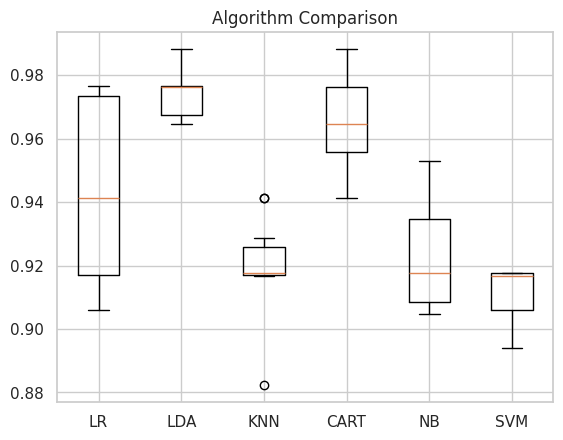

In [54]:

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

## From the result above we can see that our LDA (LinearDiscriminantAnalysis) gave us the best result